In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
if IN_COLAB:
    !pip install zfit
import math
from pylab import figure, cm

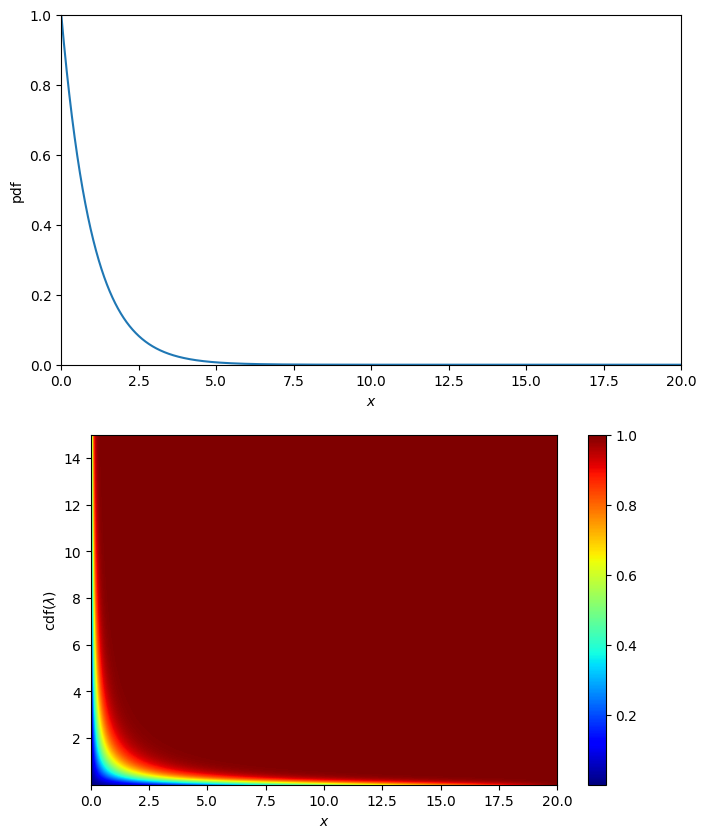

In [3]:
lambda_sim = 1
x = np.linspace(0, 20, 10000)
l = np.linspace(0.0001,15.0001,1000)

x_1, l_1 = np.meshgrid(x, l)

pdf = lambda_sim*np.exp(-x*lambda_sim)
pdf_lambda = l_1*np.exp(-x_1*l_1)

cdf_lambda = np.empty([len(l),len(x)], float)

for slices in l_1:
    cdf_lambda[np.where(l_1 == slices)[0][0], :] = np.cumsum(pdf_lambda[np.where(l_1 == slices)[0][0], :])
    cdf_lambda[np.where(l_1 == slices)[0][0], :] = cdf_lambda[np.where(l_1 == slices)[0][0], :]/cdf_lambda[np.where(l_1 == slices)[0][0], -1]

plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
plt.xlabel("$x$")
plt.ylabel("pdf")
plt.xlim(0, 20)
plt.ylim(0, lambda_sim)
plt.plot(x, pdf)

plt.subplot(2, 1, 2)
plt.xlabel("$x$")
plt.ylabel("cdf($\lambda$)")
plt.imshow(cdf_lambda,extent=[np.min(x_1),np.max(x_1),np.min(l_1),np.max(l_1)], cmap=cm.jet, origin='lower')
plt.colorbar()
plt.show()

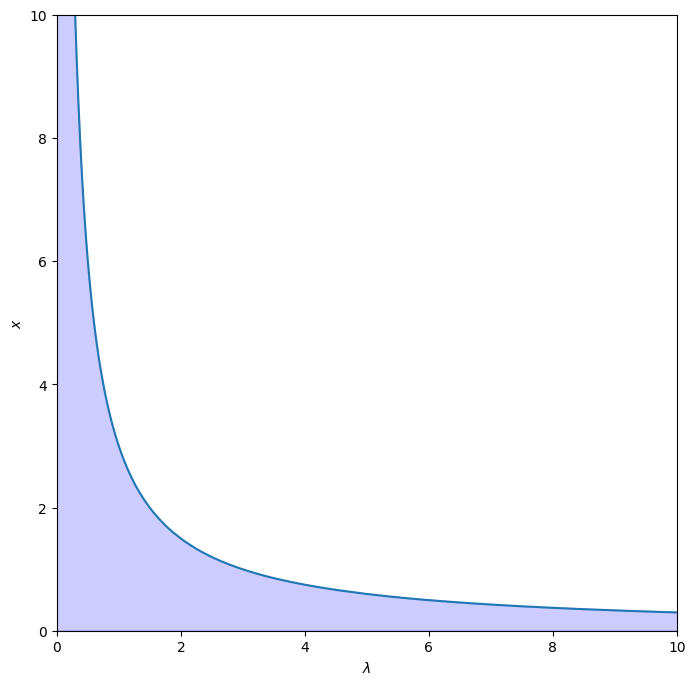

In [34]:
CL = 95/100 #95%

def getDecOrdCL(lamb, CL):
    xmax = np.empty([len(l)], float)
    for slices in lamb:
        try:
            xpos = np.where(np.abs(cdf_lambda[np.where(lamb == slices)[0][0], :] - CL) < 0.00005)[0][0]
        except:
            try:
                xpos = np.where(np.abs(cdf_lambda[np.where(lamb == slices)[0][0], :] - CL) < 0.0002)[0][0]
            except:
                xpos = np.where(np.abs(cdf_lambda[np.where(lamb == slices)[0][0], :] - CL) < 0.001)[0][0]
        xmax[np.where(lamb == slices)[0][0]] = x[xpos]
    return xmax
    
x_max = getDecOrdCL(l_1, CL)

plt.figure(figsize=(8, 8))
plt.xlabel("$\lambda$")
plt.ylabel("$x$")
plt.xlim(0, np.max(l))
plt.ylim(0, np.max(x))
plt.plot(l, x_max)

plt.fill_between(
        x = l, 
        y1 = x_max,
        color = "b",
        alpha = 0.2)
        
plt.show()

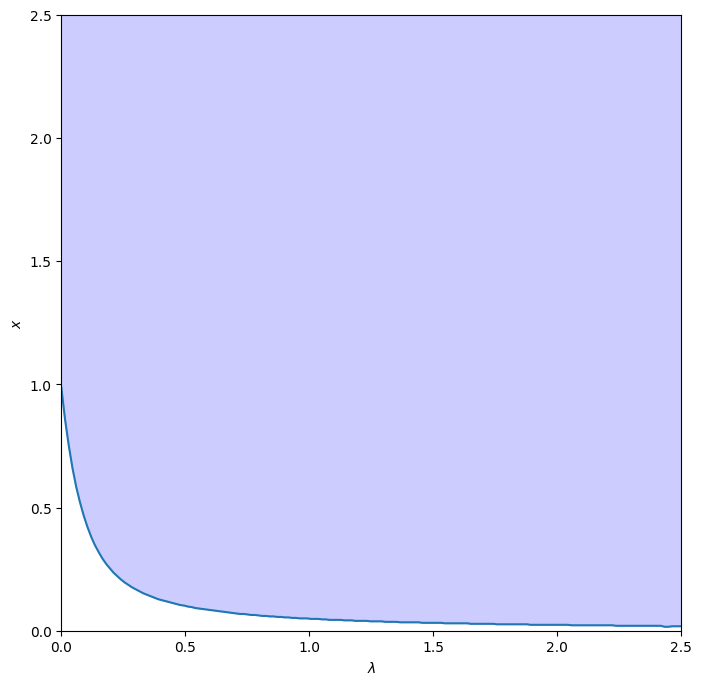

In [38]:
CL = 95/100 #95%

def getIncOrdCL(lamb, CL):
    xmin = np.empty([len(l)], float)
    for slices in lamb:
        try:
            xpos = np.where(np.abs(cdf_lambda[np.where(lamb == slices)[0][0], :] - (1 - CL)) < 0.0005)[0][0]
        except:
            try:
                xpos = np.where(np.abs(cdf_lambda[np.where(lamb == slices)[0][0], :] - (1 - CL)) < 0.002)[0][0]
            except:
                xpos = np.where(np.abs(cdf_lambda[np.where(lamb == slices)[0][0], :] - (1 - CL)) < 0.01)[0][0]
        xmin[np.where(lamb == slices)[0][0]] = x[xpos]
    return xmin
    
x_min = getIncOrdCL(l_1, CL)

plt.figure(figsize=(8, 8))
plt.xlabel("$\lambda$")
plt.ylabel("$x$")
plt.xlim(0, 2.5)
plt.ylim(0, 2.5)
plt.plot(l, x_min)

plt.fill_between(
        x = l, 
        y1 = x_min,
        y2 = np.max(x),
        color = "b",
        alpha = 0.2)
        
plt.show()